In [1]:
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [34]:
# def oht_my_god():
#     image_input = input('이미지 경로를 입력해주세요: ')
        
#     texture_input = Image.open(image_input)
#     style_input = Image.open(image_input)
#     category_input = Image.open(image_input)
    
#     # 학습왼료된 모델 불러오기
#     texture_model = load_model('texture_model.h5')
#     style_model =load_model('style_model.h5')
#     category_model =load_model('category_model.h5')
    
#     # ------- 입력이미지의 texture 특성 알아내기 ------- #
#     dic_texture = {'abstract' : 0,'camo': 1,'cheveron' :2,'dot' : 3,'floral' : 4,'graphic' : 5,'plaid' : 6,'leopard' : 7,'stripes' : 8,'pattern' : 9,'none' : 10}

#     def texture_dict_name(input_label):
#         for attribute, label in dic_texture.items(): # 딕셔너리에 아이템을 하나씩 접근해서, key, value를 각각 attribute, label에 저장
#             if label == input_label:
#                 return attribute
        
#     texture_input = texture_input.resize((128,128))
#     texture_data = np.asarray(texture_input)
#     X = np.array(texture_data)
#     X = X.astype("float") / 256
#     X = X.reshape(-1, 128, 128, 3) 
#     texture_pred = texture_model.predict(X)
#     texture_result = [np.argmax(value) for value in texture_pred]
#     # ------------------------------------------------ #
    
    
#     # ------- 입력이미지의 style 특성 알아내기 ------- #
#     dic_style = {'dandy' : 0, 'cute' : 1, 'sexy' : 2, 'feminine' : 3, 'tough' : 4, 'active' : 5,'boho' : 6, 'chic' : 7, 'basic' : 8, 'unique' : 9}

#     def style_dict_name(input_label):
#         for attribute, label in dic_style.items(): # 딕셔너리에 아이템을 하나씩 접근해서, key, value를 각각 attribute, label에 저장
#             if label == input_label:
#                 return attribute
    
#     style_input = style_input.resize((128,128))
#     style_data = np.asarray(style_input)
#     Y = np.array(style_data)
#     Y = Y.astype("float") / 256
#     Y = Y.reshape(-1, 128, 128, 3) 
#     style_pred = style_model.predict(Y)
#     style_result = [np.argmax(value) for value in style_pred]
#     # ------------------------------------------------ #
    
    
#     # ------- 입력이미지의 category 특성 알아내기 ------- #
#     dic_category = {'Blazer' : 0,'Blouse' : 1,'Bomber' : 2,'Button_Down' : 3,'Cardigan' : 4,'Flannel' : 5,'Halter' : 6,'Henley' : 7,'Hoodie' : 8,'Jacket' : 9,'Jersey' : 10,'Parka' : 11,'Peacoat' : 12,'Poncho' : 13,'Sweater' : 14,'Tank' : 15,'Tee' : 16,'Top' : 17,'Turtleneck' : 18,'Capris' : 19,'Chinos' : 20,'Culottes' : 21,'Cutoffs' : 22,'Jeans' : 23,'Jeggings' : 24,'Joggers' : 25,'Leggings' : 26,'Shorts' : 27}

#     def category_dict_name(input_label):
#         for attribute, label in dic_category.items(): # 딕셔너리에 아이템을 하나씩 접근해서, key, value를 각각 attribute, label에 저장
#             if label == input_label:
#                 return attribute
            
#     category_input = category_input.resize((128,128))
#     category_data = np.asarray(category_input)
#     Z = np.array(category_data)
#     Z = Z.astype("float") / 256
#     Z = Z.reshape(-1, 128, 128, 3) 

#     category_pred = category_model.predict(Z)
#     category_result = [np.argmax(value) for value in category_pred]
#     # ------------------------------------------------ #
    
    
#     # 입력 이미지 attribute 딕셔너리 만들기

#     input_attribute = { 
#         'texture' : texture_dict_name(texture_result[0]), 
#         'style' : style_dict_name(style_result[0]), 
#         'category' : category_dict_name(category_result[0])
#     }
    
#     # ------- Value Matrix ------- #
#     vm_texture = pd.read_csv(r'C:\Users\cw\oht_my_god/vm_texture.csv')
#     vm_style = pd.read_csv(r'C:\Users\cw\oht_my_god/vm_style.csv')
#     vm_category = pd.read_csv(r'C:\Users\cw\oht_my_god/vm_category.csv')
    
    
#     # 입력 특성에 따른 출력 우선 순위 정하기
#     vt_output = vm_texture[['attribute',input_attribute['texture']]].sort_values(by=[input_attribute['texture']])
#     vs_output = vm_style[['attribute', input_attribute['style']]].sort_values(by=[input_attribute['style']])
#     vc_output = vm_category[['attribute', input_attribute['category']]].sort_values(by=[input_attribute['category']])

#     vt_list = [vt_output.iloc[0,0],vt_output.iloc[1,0],vt_output.iloc[2,0]]
#     vs_list = [vs_output.iloc[0,0],vs_output.iloc[1,0],vs_output.iloc[2,0]]
#     vc_list = [vc_output.iloc[0,0],vc_output.iloc[1,0],vc_output.iloc[2,0]]
    
    
#     # 각 특성별로 랜덤으로 하나씩 뽑기
#     # 입력과 어울리는 특성 3개중 하나를 선택
#     output_texture = random.choice(vt_list) 
#     output_style = random.choice(vs_list)
#     output_category = random.choice(vc_list)
    
    
#     # 출력할 특성이 담긴 딕셔너리 생성
#     output_attribute = {
#         'texture' : output_texture,
#         'style' : output_style,
#         'category' : output_category
#     }
    
#     # 전체 데이터 프레임 불러오기
#     df = pd.read_csv(r'oht_my_god_data_table_final.csv') # 필요시 이미지 경로에 맞게 image_name 열 수정할 것
    
    
#     # 출력할 attribute를 모두 만족하는 이미지 이름 하나 / 3개 가져온다
#     output_df = df[ ( ((df['texture_1'] == output_attribute['texture'])| (df['texture_2'] == output_attribute['texture'])) &
#                     (df['category_name'] == output_attribute['category']) ) |
                   
#                     ( ((df['style_1'] == output_attribute['style']) | (df['style_2'] == output_attribute['style'])) &
#                     (df['category_name'] == output_attribute['category']) )
#                   ]
    
#     output_images = []
#     new_row_num = []
#     for i in range(len(output_df.index)):
#         new_row_num.append(i)
#     output_df.index = new_row_num
    
    
#     for i in range(len(output_df.index)):
#         output_images.append(output_df['image_name'][i])

    
#     # 출력값과 맞는 이미지 이름 리스트 생성
#     # output_image_name = random.choice(output_images) # 모든 출력 특성을 만족하는 이미지 중 하나를 랜덤으로 선택
#     output_image_name = random.sample(output_images, 3) # 모든 출력 특성을 만족하는 이미지 중 3개를 랜덤으로 선택
    
#     # 출력 이미지 변수로 저장
#     output_image_1 = output_image_name[0] # 이미지_1 경로 (타입: 문자열)
#     output_image_2 = output_image_name[1]
#     output_image_3 = output_image_name[2]
    
#     output_image_1 = Image.open(output_image_1)
#     output_image_2 = Image.open(output_image_2)
#     output_image_3 = Image.open(output_image_3)
    
#     output_image_1 = plt.imshow(output_image_1)
#     output_image_2 = plt.imshow(output_image_2)
#     output_image_3 = plt.imshow(output_image_3)
    
#     #--------입력이미지 특성값-----------#
#     input_texture_attr = input_attribute['texture']
#     input_style_attr = input_attribute['style']
#     input_category_attr = input_attribute['category']
    
    
    
#     return output_image_1, output_image_2, output_image_3
# # print('입력 이미지의 texture 특성은 :', input_texture_attr),print('입력 이미지의 style 특성은 :', input_style_attr), print('입력 이미지의 category 특성은 :', input_category_attr)


이미지 경로를 입력해주세요: C:\Users\cw\oht_my_god/test_1.jpg


(<matplotlib.image.AxesImage at 0x1db099a16c8>,
 <matplotlib.image.AxesImage at 0x1db76313688>)

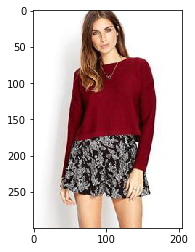

In [36]:
# oht_my_god()


AxesImage(54,36;334.8x217.44)


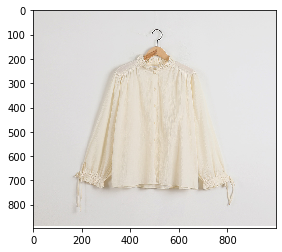

In [159]:
image_input = 'test_1.jpg' # 이미지 경로 직접 설정

texture_input = Image.open(image_input)
style_input = Image.open(image_input)
category_input = Image.open(image_input)

# 학습왼료된 모델 불러오기
texture_model = load_model('texture_model.h5')
style_model =load_model('style_model.h5')
category_model =load_model('category_model.h5')

# ------- 입력이미지의 texture 특성 알아내기 ------- #
dic_texture = {'abstract' : 0,'camo': 1,'cheveron' :2,'dot' : 3,'floral' : 4,'graphic' : 5,'plaid' : 6,'leopard' : 7,'stripes' : 8,'pattern' : 9,'none' : 10}

def texture_dict_name(input_label):
    for attribute, label in dic_texture.items(): # 딕셔너리에 아이템을 하나씩 접근해서, key, value를 각각 attribute, label에 저장
        if label == input_label:
            return attribute

texture_input = texture_input.resize((128,128))
texture_data = np.asarray(texture_input)
X = np.array(texture_data)
X = X.astype("float") / 256
X = X.reshape(-1, 128, 128, 3) 
texture_pred = texture_model.predict(X)
texture_result = [np.argmax(value) for value in texture_pred]
# ------------------------------------------------ #


# ------- 입력이미지의 style 특성 알아내기 ------- #
dic_style = {'dandy' : 0, 'cute' : 1, 'sexy' : 2, 'feminine' : 3, 'tough' : 4, 'active' : 5,'boho' : 6, 'chic' : 7, 'basic' : 8, 'unique' : 9}

def style_dict_name(input_label):
    for attribute, label in dic_style.items(): # 딕셔너리에 아이템을 하나씩 접근해서, key, value를 각각 attribute, label에 저장
        if label == input_label:
            return attribute

style_input = style_input.resize((128,128))
style_data = np.asarray(style_input)
Y = np.array(style_data)
Y = Y.astype("float") / 256
Y = Y.reshape(-1, 128, 128, 3) 
style_pred = style_model.predict(Y)
style_result = [np.argmax(value) for value in style_pred]
# ------------------------------------------------ #


# ------- 입력이미지의 category 특성 알아내기 ------- #
dic_category = {'Blazer' : 0,'Blouse' : 1,'Bomber' : 2,'Button_Down' : 3,'Cardigan' : 4,'Flannel' : 5,'Halter' : 6,'Henley' : 7,'Hoodie' : 8,'Jacket' : 9,'Jersey' : 10,'Parka' : 11,'Peacoat' : 12,'Poncho' : 13,'Sweater' : 14,'Tank' : 15,'Tee' : 16,'Top' : 17,'Turtleneck' : 18,'Capris' : 19,'Chinos' : 20,'Culottes' : 21,'Cutoffs' : 22,'Jeans' : 23,'Jeggings' : 24,'Joggers' : 25,'Leggings' : 26,'Shorts' : 27}

def category_dict_name(input_label):
    for attribute, label in dic_category.items(): # 딕셔너리에 아이템을 하나씩 접근해서, key, value를 각각 attribute, label에 저장
        if label == input_label:
            return attribute

category_input = category_input.resize((128,128))
category_data = np.asarray(category_input)
Z = np.array(category_data)
Z = Z.astype("float") / 256
Z = Z.reshape(-1, 128, 128, 3) 

category_pred = category_model.predict(Z)
category_result = [np.argmax(value) for value in category_pred]
# ------------------------------------------------ #


# 입력 이미지 attribute 딕셔너리 만들기

input_attribute = { 
    'texture' : texture_dict_name(texture_result[0]), 
    'style' : style_dict_name(style_result[0]), 
    'category' : category_dict_name(category_result[0])
}

# ------- Value Matrix ------- #
vm_texture = pd.read_csv(r'C:\Users\cw\oht_my_god/vm_texture.csv')
vm_style = pd.read_csv(r'C:\Users\cw\oht_my_god/vm_style.csv')
vm_category = pd.read_csv(r'C:\Users\cw\oht_my_god/vm_category.csv')


# 입력 특성에 따른 출력 우선 순위 정하기
vt_output = vm_texture[['attribute',input_attribute['texture']]].sort_values(by=[input_attribute['texture']])
vs_output = vm_style[['attribute', input_attribute['style']]].sort_values(by=[input_attribute['style']])
vc_output = vm_category[['attribute', input_attribute['category']]].sort_values(by=[input_attribute['category']])

vt_list = [vt_output.iloc[0,0],vt_output.iloc[1,0],vt_output.iloc[2,0]]
vs_list = [vs_output.iloc[0,0],vs_output.iloc[1,0],vs_output.iloc[2,0]]
vc_list = [vc_output.iloc[0,0],vc_output.iloc[1,0],vc_output.iloc[2,0]]


# 각 특성별로 랜덤으로 하나씩 뽑기
# 입력과 어울리는 특성 3개중 하나를 선택
output_texture = random.choice(vt_list) 
output_style = random.choice(vs_list)
output_category = random.choice(vc_list)


# 출력할 특성이 담긴 딕셔너리 생성
output_attribute = {
    'texture' : output_texture,
    'style' : output_style,
    'category' : output_category
}

# 전체 데이터 프레임 불러오기
df = pd.read_csv(r'oht_my_god_data_table_final.csv') # 필요시 이미지 경로에 맞게 image_name 열 수정할 것


# 출력할 attribute를 모두 만족하는 이미지 이름 하나 / 3개 가져온다
output_df = df[ ( ((df['texture_1'] == output_attribute['texture'])| (df['texture_2'] == output_attribute['texture'])) &
                (df['category_name'] == output_attribute['category']) ) |

                ( ((df['style_1'] == output_attribute['style']) | (df['style_2'] == output_attribute['style'])) &
                (df['category_name'] == output_attribute['category']) )
              ]

output_images = []
new_row_num = []
for i in range(len(output_df.index)):
    new_row_num.append(i)
output_df.index = new_row_num


for i in range(len(output_df.index)):
    output_images.append(output_df['image_name'][i])


# 출력값과 맞는 이미지 이름 리스트 생성
# output_image_name = random.choice(output_images) # 모든 출력 특성을 만족하는 이미지 중 하나를 랜덤으로 선택
output_image_name = random.sample(output_images, 3) # 모든 출력 특성을 만족하는 이미지 중 3개를 랜덤으로 선택

# 출력 이미지 변수로 저장
output_image_1 = output_image_name[0] # 이미지_1 경로 (타입: 문자열)
output_image_2 = output_image_name[1]
output_image_3 = output_image_name[2]

output_image_1 = Image.open(output_image_1)
output_image_2 = Image.open(output_image_2)
output_image_3 = Image.open(output_image_3)

# output_image_1 = plt.imshow(output_image_1)
# output_image_2 = plt.imshow(output_image_2)
# output_image_3 = plt.imshow(output_image_3)

#--------입력이미지 특성값-----------#
input_texture_attr = input_attribute['texture']
input_style_attr = input_attribute['style']
input_category_attr = input_attribute['category']


print(plt.imshow(Image.open(image_input)))


AxesImage(54,36;334.8x217.44)
입력 이미지의 texture 특성은 : abstract
입력 이미지의 style 특성은 : dandy
입력 이미지의 category 특성은 : Blazer


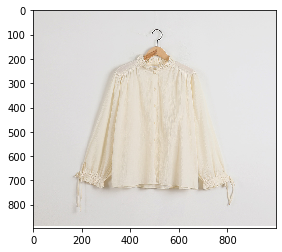

In [97]:
print(plt.imshow(Image.open(image_input)))
print('입력 이미지의 texture 특성은 :', input_texture_attr)
print('입력 이미지의 style 특성은 :', input_style_attr)
print('입력 이미지의 category 특성은 :', input_category_attr)

입력 상의에 맞는 하의 사진 3개 출력

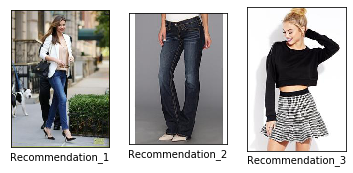

In [160]:
output_images = [output_image_name[0], output_image_name[1], output_image_name[2]]


for i in range(len(output_images)):  
    output_images = output_image_name[i]
    output_images = Image.open(output_images)
    plt.subplot(1,3,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Recommendation_{}".format(i+1))
    plt.imshow(output_images)